# Analyzing Traffic Indicators

In this project, we will analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). This dataset was made available by John Hogue and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume). 

Our goal in this project is to determine a few indicators of heavy traffic on I-94. Is it the weather that causes the traffic to worsen, or is it the time of day? As we explore and analyze our data, we will also use various data visualization methods to help us identify correlations, distributions, and relationships.

Let's start by importing our `numpy` and `pandas` libraries, and exploring our dataset.

### Initial Exploration

In [2]:
import numpy as np
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', encoding='UTF-8')

print(traffic[:5])

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
print(traffic[-5:])

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0          90  Thunderstorm   
48202     NaN  282.09      0.0      0.0          90        Clouds   
48203     NaN  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The results above, show that our dataset contains nine columns and 48204 rows. We also noticed that the `holiday` column possibly has some null values. However, we will not be looking into that column in this project, so we do not need to correct it. As everything else seems to be in order, we will move on.

#### Evaluating the `traffic_volume` column

Next, we are going to explore the `traffic_volume` column. We are looking for patterns or clues that might help us narrow down what induces traffic to worsen. First, using the `.describe()` method, we will look at the information in the data itself. Then, after we import the `matplotlib.pyplot` library, we will make a histogram to help us visualize any patterns in the `traffic_volume` column.

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

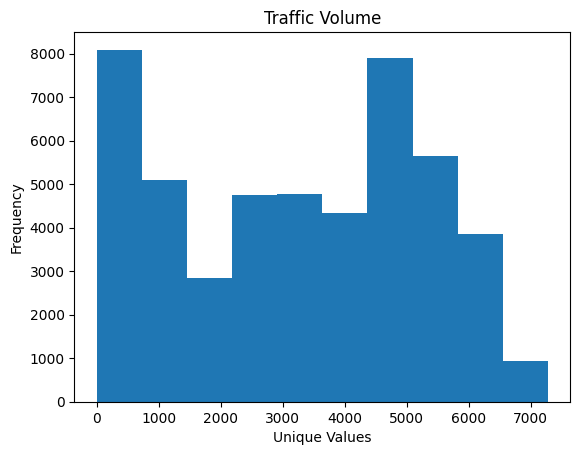

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.title('Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

In observing our results from the `traffic_volume` column, we can see that the values range widely. In the results from the `.describe()` method, above the histogram, we can see that we have a minimum of `0.0` to a maximum of `7280.0`. We can also observe that roughly 25% of the time, there were 1,193 cars or less passing the station each hour. This is likely due to low traffic volumes during the night or when the road is undergoing construction. Approximately 75% of the time, the traffic volume was 4,933 cars or less. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. This indicates that traffic volume may be influenced by the time of day.

Keeping this in mind, we then turn to our histogram. The x-axis represents all the unique values (traffic volume recordings) in the column, while the y-axis represents the frequency, or how many times each value appears in the column. We can see a high frequency in the 0-1000 range, and also in the 4500-5500 range. This continues in the same line as our previous suspicions, with minimal traffic during the night hours (0-1000) and high traffic during the day (4500-5500).

With that possibility, we now have our next step of analysis: comparing daytime and nighttime data. We will first divide the dataset into two parts, the daytime data (7 a.m. to 7 p.m.) and the nighttime data (7 p.m. to 7 a.m.). Although this is not a perfect division between night and day, it is a good place to start.

### Traffic Volume: Day vs. Night - Part 1

In [7]:
# converting the 'date_time' column to a better format
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# isolating the hours and separtating the nighttime and daytime hours
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


Now that we have separated our day and night hours, we will compare the day and night traffic volume using two histograms side-by-side on a grid chart. We will look deeper into our day and night `traffic_volume` columns as well.

### Traffic Volume: Day vs. Night - Part 2

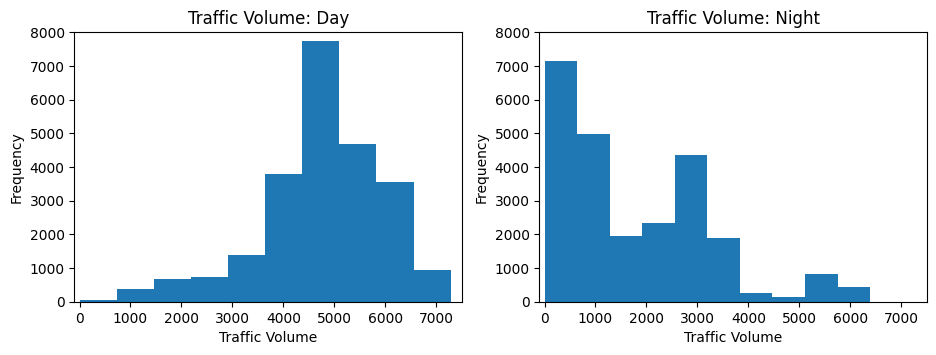

In [8]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [9]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In our histogram grid chart, we can see that the main body of the data in the day histogram is on the far right side of the chart, in the high traffic volume range. The main body of the data in the night histogram, on the other hand, is on the far left side of the chart, ranging low in traffic volume. We can see a similar pattern in the descriptions of both histograms, with the day histogram having a large frequency of high-traffic volume recordings, and the night histogram having a large frequency of low-traffic volume recordings.

With these conclusions drawn from our first analysis, it is clear that whatever causes traffic to worsen is happening during the daytime hours. Since we are trying to narrow our search, we will focus only on the daytime data, instead of the nighttime data, which is of little or no use in identifying heavy traffic indicators.

### Time Indicators

Our next step of action is going to be analyzing different aspects of the daytime data to see if we can find any heavy traffic indicators. The first aspect we are going to explore is time. It is highly possible that there might be more people on the road at certain points in time. In the code below, we are going to generate several line plots to see how the traffic volume changed according to these parameters:
- Month
- Day of the week
- Time of day

Let's start with the month parameter.

#### Traffic Volume Vs. Month

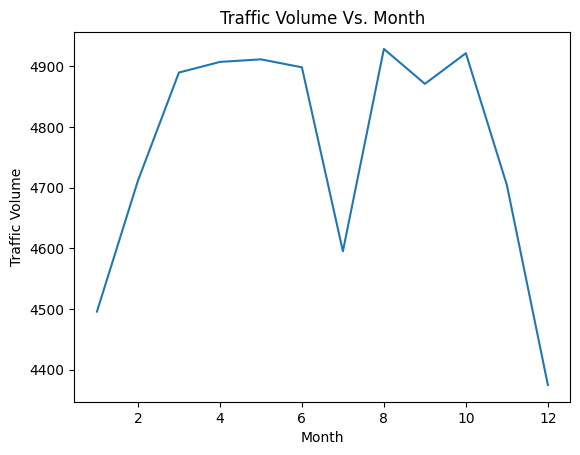

In [25]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby(by='month').mean(numeric_only=True)
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume Vs. Month')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.show()

While we may have expected to see the traffic volume spike around December (12), that is not what we found. Instead, we see that there is generally more traveling in the warmer months, and much less in the cold months.

#### Traffic Volume Vs. Day of the Week

Now we will continue to build a plot line for the average traffic volume for each day of the week. For the x-axis containing the weekday values, 0 is Monday and 6 is Sunday.

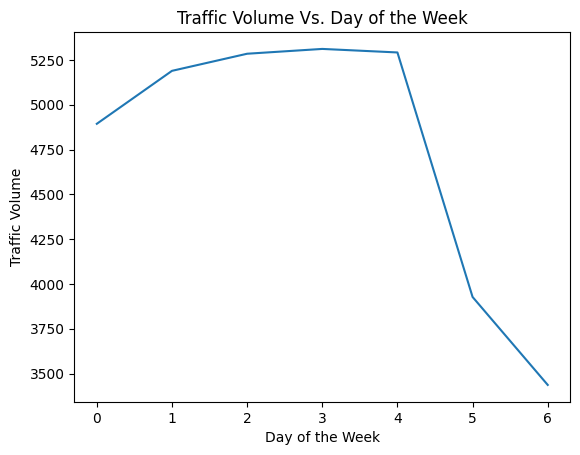

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume Vs. Day of the Week')
plt.ylabel('Traffic Volume')
plt.xlabel('Day of the Week')
plt.show()

Above we can see that the traffic volume is much higher during the weekdays (Monday-Friday) than it is on the weekends (Saturday-Sunday). It also slowly increases throughout the weekdays, suggesting that more people travel or commute towards the end of the week than at the beginning.

#### Traffic Volume Vs. Time of Day

Let's move on to our next plot line: average traffic volume vs. different times of day. Since we just looked at Traffic Volume Vs. Day of the Week, we know that the averages vary widely between weekdays and weekends. Because of this we will split the averages and look at the average traffic volume vs. different times of day for the weekdays and the weekends.

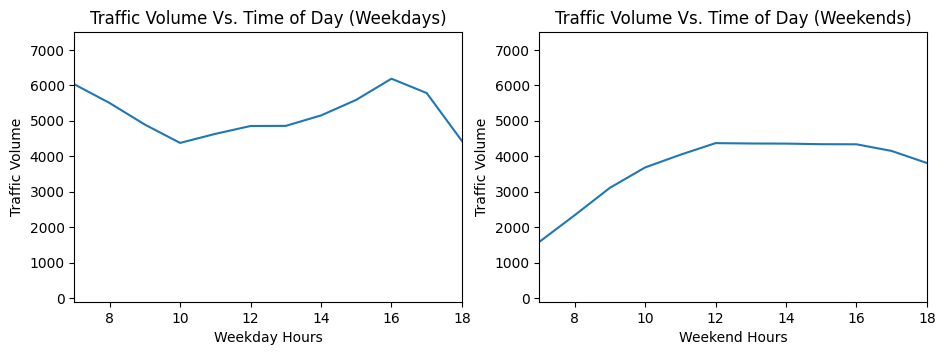

In [27]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(7, 18)
plt.ylim(-100, 7500)
plt.title('Traffic Volume Vs. Time of Day (Weekdays)')
plt.ylabel('Traffic Volume')
plt.xlabel('Weekday Hours')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(7, 18)
plt.ylim(-100, 7500)
plt.title('Traffic Volume Vs. Time of Day (Weekends)')
plt.ylabel('Traffic Volume')
plt.xlabel('Weekend Hours')

plt.show()

In studying our graphs above, we can see that the traffic volume on the weekdays spikes in the morning and evening, most likely when people are commuting to and from work. On the weekend graph, we see that the traffic volume is low in the morning and gradually rises throughout the day. This is probably due to people having more relaxed schedules on the weekends.

As we have analyzed the changes in traffic volume based on different time parameters, we have seen that time is clearly an indicator of heavy traffic. Depending on the time of day, what day, and the time of year, you may find yourself in quite a traffic jam. We also found that there are times when the opposite is true. If you want to find yourself with clearer roads, try traveling in the early morning, on weekends, and in the colder months.

### Weather Indicators

Now that we have thoroughly searched out any time indicators of heavy traffic, we are now going to search out any weather indicators. In our dataset, we have many columns about the weather:
- `temp`
- `rain_1h`
- `snow_1h`
- `clouds_all`
- `weather_main`
- `weather_description`

Let's start by looking at the data type of each column.

In [14]:
print('temp : ' + str(traffic['temp'].dtype))
print('rain_1h : ' + str(traffic['rain_1h'].dtype))
print('snow_1h : ' + str(traffic['snow_1h'].dtype))
print('clouds_all : ' + str(traffic['clouds_all'].dtype))
print('weather_main : ' + str(traffic['weather_main'].dtype))
print('weather_description : ' + str(traffic['weather_description'].dtype))

temp : float64
rain_1h : float64
snow_1h : float64
clouds_all : int64
weather_main : object
weather_description : object


Above we can see that the `temp`, `rain_1h`, `snow_1h`, and `clouds_all` columns contain numeric values, while the `weather_main` and `weather_description` columns contain string values. Next, we will calculate the correlations between the numeric columns and the `traffic_volume` column.

In [15]:
# 'temp' vs. 'traffic_volume correlation
traffic['temp'].corr(traffic['traffic_volume'])

np.float64(0.13029879817112675)

In [16]:
# 'rain_1h' vs. 'traffic_volume correlation
traffic['rain_1h'].corr(traffic['traffic_volume'])

np.float64(0.004713702367859229)

In [17]:
# 'snow_1h' vs. 'traffic_volume correlation
traffic['snow_1h'].corr(traffic['traffic_volume'])

np.float64(0.0007334345358283802)

In [18]:
# 'clouds_all' vs. 'traffic_volume correlation
traffic['clouds_all'].corr(traffic['traffic_volume'])

np.float64(0.06705377704283519)

From these results, `temp` seems to have a stronger correlation than the others. Following this clue, we will generate a scatter plot graph between `traffic_volume` and `temp`. This will show us if we indeed have found another indicator of heavy traffic. Before we create our scatter plot, however, we will explore the `temp` column to make sure everything is in order.

In [19]:
unique_temp = traffic["temp"].unique()
print(len(unique_temp))

5843


In [20]:
# rounding all temp values to 2 decimal places
traffic['temp'] = traffic['temp'].round(2)
print(traffic['temp'].head())

0    288.28
1    289.36
2    289.58
3    290.13
4    291.14
Name: temp, dtype: float64


Above, we explored our `temp` column and rounded all our `temp` values up to 2 decimal places. In doing so, we also noticed that our `temp` values seem to be in the Kelvin scale. To make our scatter plot easier to interpret, we will convert the `temp` values to the Celcius scale below.

In [21]:
def conversion(x):
    new_temp = (x - 273.15)
    return new_temp

new_temp_column = traffic['temp'].apply(conversion)

traffic['temp'] = new_temp_column

print(traffic['temp'].head())

0    15.13
1    16.21
2    16.43
3    16.98
4    17.99
Name: temp, dtype: float64


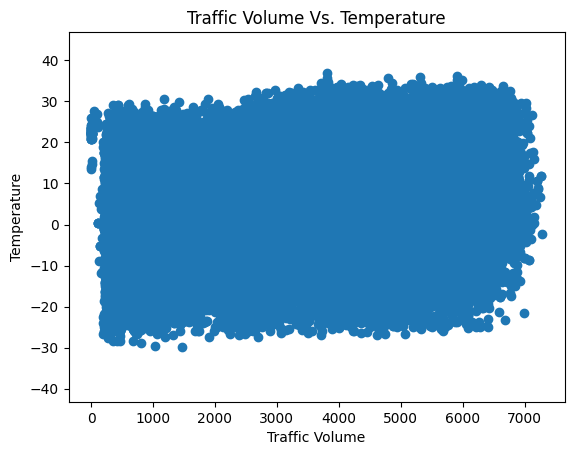

In [22]:
plt.scatter(traffic['traffic_volume'], traffic['temp'])
plt.title('Traffic Volume Vs. Temperature')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(-43.15, 46.85) # avoiding two wrong temperatures values that mess up the y-axis
plt.show()

The scatter plot graph above shows that once the temperature (measured in the Kelvin scale) gets over a certain point, there is a relationship between the temperature and the traffic volume. However, even though there is a strong correlation between them, this does not automatically prove that we have a heavy traffic indicator here. On the contrary, looking closer at the graph, we can see that each unique traffic volume value has about the same frequency over a certain temperature. This shows us that there is traffic in warmer weather, but not that warmer weather is a direct indicator of a heavy increase in traffic.

Now that we have ruled out the numeric weather columns, let's turn to the categorical weather-related columns:
- `weather_main`
- `weather_description`

We are going to investigate these two columns to see if they hold any heavy traffic indicator potential. To do this we are going to calculate the average traffic volume associated with each unique value in these two columns. Then we will create a bar plot for each column.

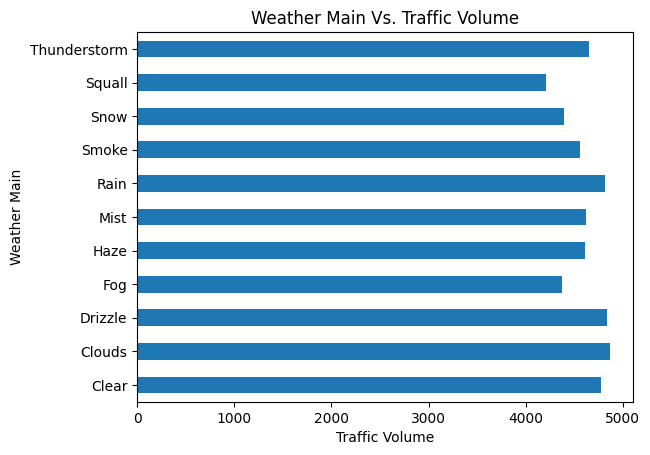

In [23]:
# 'weather_main' column
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather Main Vs. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.show()

In the horizontal bar plot above, we can see the average traffic volume for each value in the `weather_main` column. Looking closely, we can see that there isn't any traffic volume exceeding 5,000 cars. This shows us that there aren't any specific weather types in this column that are heavy traffic indicators.

Let's move on to the `weather_description` column.

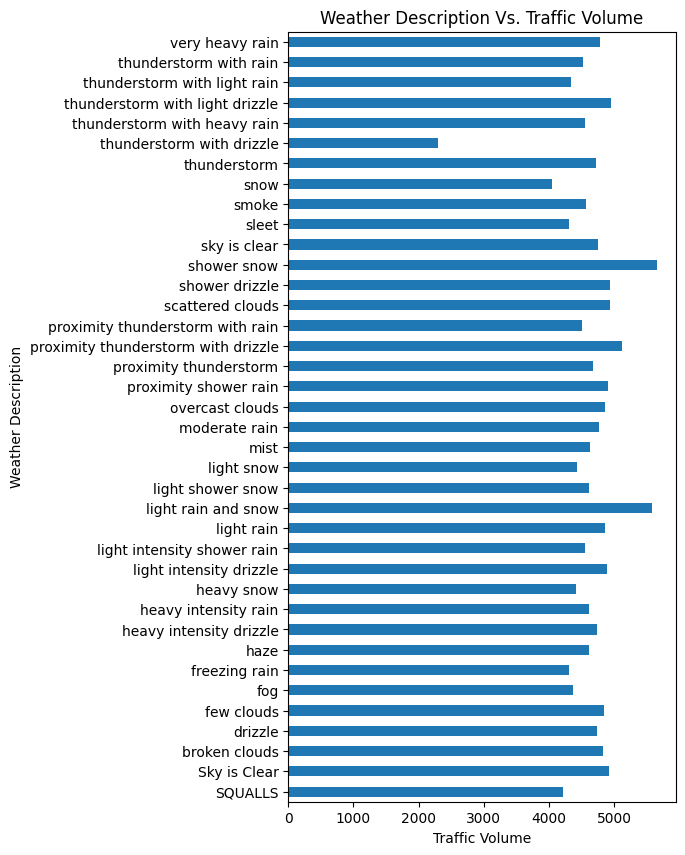

In [28]:
# 'weather_main' column
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.title('Weather Description Vs. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

As we study the bar graph above, we can see four bars that stand out, their traffic volume measuring above or close to 5000 cars. These bars are `light rain and snow`, `shower snow`, `thunderstorm with light drizzle`, and `proximity thunderstorm with drizzle`. Since this is unfavorable weather to drive in, it may suggest that people in this region do not mind their cars being out in such weather or that they own vehicles that can withstand weather impact. Another probability to think about is that the weather could be slowing down and/or bogging traffic. The traffic may not be very high in volume before a storm, but when the storm begins/continues, the traffic volume is raised. 

Turning back for a moment to our four outstanding bars, we see that two contain snow, and the other two rain/thunderstorms. Out of these four, the `thunderstorm with light drizzle` and `proximity thunderstorm with drizzle` columns are puzzling. It seems a bit peculiar for this type of weather, which is not extremely severe, to have this amount of traffic volume. As this seems a bit unexplainable, it suggests that we perhaps have some faulty data regarding the rain/thunderstorms category. While the traffic volume of these columns is technically high enough to qualify them as high traffic indicators, we are reluctant to give them full recognition, based upon them not possessing enough supporting evidence.

As for the other two snow columns, `light rain and snow` and `shower snow`, they are a bit more understandable. The effects of snow on roads are self-explanatory, causing traffic to slow down considerably. As these two columns seem to hold enough evidence to support themselves, we can identify them as indicators of heavy traffic.

### Conclusion

Throughout this project, we have been searching for indicators of traffic worsening. Now that we have found a few, we need to categorize them. Which are stronger indicators, and which are weaker indications? Below, we will calculate the correlations between our indicator categories and traffic volume. Whichever has the strongest correlation will be a stronger indicator and vice versa. 

In [52]:
print("Month Vs. Traffic Volume Correlations: " + str(day['month'].corr(traffic["traffic_volume"])))
print("Day of Week Vs. Traffic Volume Correlations: " + str(day['dayofweek'].corr(traffic["traffic_volume"])))
print("Hour Vs. Traffic Volume Correlations: " + str(day['hour'].corr(traffic["traffic_volume"])))
weather = day['weather_description'].astype('category').cat.codes
print("Weather Description Vs. Traffic Volume Correlations: " + str(weather.corr(traffic["traffic_volume"])))

Month Vs. Traffic Volume Correlations: -0.022337337687227485
Day of Week Vs. Traffic Volume Correlations: -0.4164532389200688
Hour Vs. Traffic Volume Correlations: 0.17270402382627156
Weather Description Vs. Traffic Volume Correlations: -0.006052069472824632


From studying the correlations above, we can see that the strongest correlations are ‘Day of the Week’ and ‘Hour’. This continues to support our previous observations that suggested work commutes are a problem for traffic volume. With so many people commuting to and from work, the current traffic control systems are insufficient to regulate the traffic volume. A few solutions we would suggest are:
- Improving public transit,  for example, trains, buses, and subways
- Maintaining main roads and highways
- Controlling how many vehicles are on the main highways at a time

Having drawn our conclusions, we can see how beneficial data visualization methods can be in analyzing data. It can help us recognize trends, correlations, and relationships that might have been difficult to identify otherwise. When we combine our data cleaning, exploration, and visualization tools, we can tackle virtually any dataset sent our way, with confidence.